In [29]:
import pandas as pd
import pymysql
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use ('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7.5

In [36]:
username = "*****"
password = "*****!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Lake"

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)

star_df = pd.read_sql("SELECT * FROM company_rating", con=engine)


engine.dispose()


In [3]:
star_df.head()

,id,stock_code,jobp_rating,jobp_paywellfare,jobp_worklifebal,jobp_culture,jobp_opportunity,jobp_manager,jobp_recommend,jobp_ceo,jobp_potential,jobp_cnt,blind_rating,blind_cnt,blind_opportunity,blind_worklifebal,blind_paywellfare,blind_culture,blind_manager,corp
0,1,095570,2.6,2.6,2.9,2.7,2.6,2.3,0.31,0.42,0.15,464,2.8,306.0,2.4,3.3,2.6,2.8,2.2,AJ네트웍스
1,2,006840,2.9,2.8,3.0,2.5,2.9,2.4,0.46,0.65,0.34,135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AK홀딩스
2,3,027410,3.0,3.0,2.8,2.8,2.8,2.5,0.39,0.46,0.30,1402,2.8,1201.0,2.4,3.0,2.6,2.8,2.1,BGF
3,4,282330,3.0,3.0,2.8,2.8,2.8,2.5,0.39,0.46,0.30,1402,2.8,1201.0,2.4,3.0,2.6,2.8,2.1,BGF리테일
4,5,001460,2.2,1.8,3.3,2.3,1.9,1.8,0.20,0.18,0.07,216,2.4,56.0,2.3,3.4,1.9,2.1,1.7,BYC


In [37]:
# id 칼럼 삭제 corp 칼럼 맨 앞으로 이동
star_df = star_df.drop('id', axis=1)
cols = star_df.columns.tolist() 
cols = ['corp'] + cols[:-1] 
star_df = star_df[cols]

In [5]:
star_df.head()

,corp,stock_code,jobp_rating,jobp_paywellfare,jobp_worklifebal,jobp_culture,jobp_opportunity,jobp_manager,jobp_recommend,jobp_ceo,jobp_potential,jobp_cnt,blind_rating,blind_cnt,blind_opportunity,blind_worklifebal,blind_paywellfare,blind_culture,blind_manager
0,AJ네트웍스,095570,2.6,2.6,2.9,2.7,2.6,2.3,0.31,0.42,0.15,464,2.8,306.0,2.4,3.3,2.6,2.8,2.2
1,AK홀딩스,006840,2.9,2.8,3.0,2.5,2.9,2.4,0.46,0.65,0.34,135,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BGF,027410,3.0,3.0,2.8,2.8,2.8,2.5,0.39,0.46,0.30,1402,2.8,1201.0,2.4,3.0,2.6,2.8,2.1
3,BGF리테일,282330,3.0,3.0,2.8,2.8,2.8,2.5,0.39,0.46,0.30,1402,2.8,1201.0,2.4,3.0,2.6,2.8,2.1
4,BYC,001460,2.2,1.8,3.3,2.3,1.9,1.8,0.20,0.18,0.07,216,2.4,56.0,2.3,3.4,1.9,2.1,1.7


In [6]:
# EDA
print(star_df.shape) 
print(star_df.info())
print(star_df.describe()) 

(636, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   corp               636 non-null    object 
 1   stock_code         636 non-null    object 
 2   jobp_rating        636 non-null    float64
 3   jobp_paywellfare   636 non-null    float64
 4   jobp_worklifebal   636 non-null    float64
 5   jobp_culture       636 non-null    float64
 6   jobp_opportunity   636 non-null    float64
 7   jobp_manager       636 non-null    float64
 8   jobp_recommend     636 non-null    float64
 9   jobp_ceo           636 non-null    float64
 10  jobp_potential     636 non-null    float64
 11  jobp_cnt           636 non-null    int64  
 12  blind_rating       636 non-null    float64
 13  blind_cnt          636 non-null    float64
 14  blind_opportunity  636 non-null    float64
 15  blind_worklifebal  636 non-null    float64
 16  blind_paywellfar

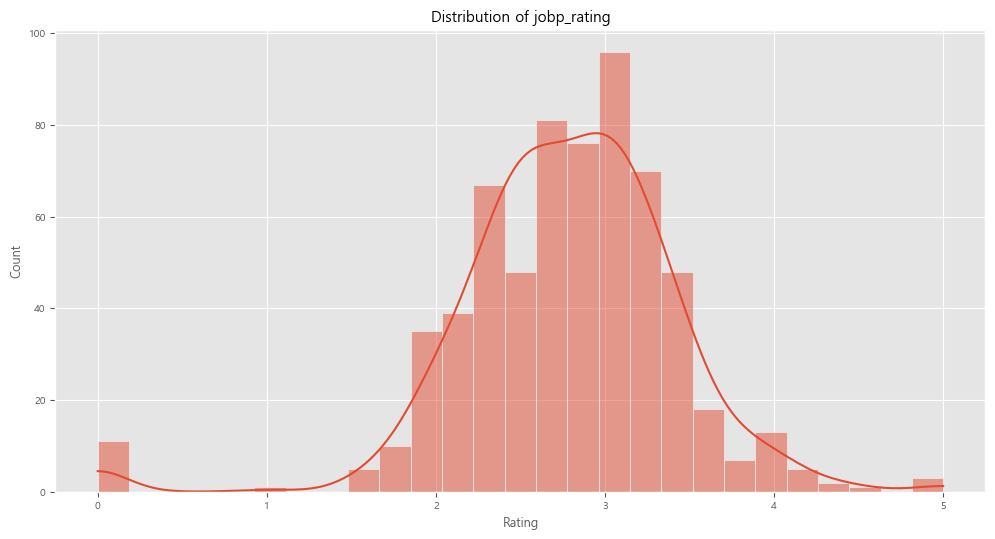

In [7]:
# jobp_rating 만 시각화 해보기

plt.figure(figsize=(12, 6))
sns.histplot(data=star_df, x='jobp_rating', kde=True)
plt.title('Distribution of jobp_rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [38]:
# 새로운 데이터프레임 생성, 블라인드와 잡플레닛 데이터 합치기, (가중치)
# 가중치를 적용하여 하나의 열로 합치기
star_df['count'] = (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['rating'] = (star_df['jobp_rating'] * star_df['jobp_cnt'] + star_df['blind_rating'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['paywellfare'] = (star_df['jobp_paywellfare'] * star_df['jobp_cnt'] + star_df['blind_paywellfare'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['worklifebal'] = (star_df['jobp_worklifebal'] * star_df['jobp_cnt'] + star_df['blind_worklifebal'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['culture'] = (star_df['jobp_culture'] * star_df['jobp_cnt'] + star_df['blind_culture'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['opportunity'] = (star_df['jobp_opportunity'] * star_df['jobp_cnt'] + star_df['blind_opportunity'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['manager'] = (star_df['jobp_manager'] * star_df['jobp_cnt'] + star_df['blind_manager'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])

# 잡플레닛만 있는 칼럼
star_df['recommend'] = (star_df['jobp_recommend'] * star_df['jobp_cnt'] + star_df['blind_rating'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['ceo'] = (star_df['jobp_ceo'] * star_df['jobp_cnt'] + star_df['blind_rating'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])
star_df['potential'] = (star_df['jobp_potential'] * star_df['jobp_cnt'] + star_df['blind_rating'] * star_df['blind_cnt']) / (star_df['jobp_cnt'] + star_df['blind_cnt'])


# 하나의 값이 0인 경우에는 해당 열의 값만 사용
star_df.loc[star_df['jobp_cnt'] == 0, 'rating'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_rating']
star_df.loc[star_df['blind_cnt'] == 0, 'rating'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_rating']
        
star_df.loc[star_df['jobp_cnt'] == 0, 'paywellfare'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_paywellfare']
star_df.loc[star_df['blind_cnt'] == 0, 'paywellfare'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_paywellfare']
                
star_df.loc[star_df['jobp_cnt'] == 0, 'worklifebal'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_worklifebal']
star_df.loc[star_df['blind_cnt'] == 0, 'worklifebal'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_worklifebal']
                
star_df.loc[star_df['jobp_cnt'] == 0, 'culture'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_culture']
star_df.loc[star_df['blind_cnt'] == 0, 'culture'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_culture']
                
star_df.loc[star_df['jobp_cnt'] == 0, 'opportunity'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_opportunity']
star_df.loc[star_df['blind_cnt'] == 0, 'opportunity'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_opportunity']
                
star_df.loc[star_df['jobp_cnt'] == 0, 'manager'] = star_df.loc[star_df['jobp_cnt'] == 0, 'blind_manager']
star_df.loc[star_df['blind_cnt'] == 0, 'manager'] = star_df.loc[star_df['blind_cnt'] == 0, 'jobp_manager']



star_df.drop(
    ['jobp_cnt','blind_cnt','jobp_rating', 'blind_rating','blind_paywellfare','jobp_paywellfare',
     'blind_worklifebal','jobp_worklifebal','blind_culture','jobp_culture','blind_opportunity',
     'jobp_opportunity','blind_manager','jobp_manager','jobp_recommend','jobp_ceo','jobp_potential']
    , axis=1, inplace=True)

In [39]:
star_df

,corp,stock_code,count,rating,paywellfare,worklifebal,culture,opportunity,manager,recommend,ceo,potential
0,AJ네트웍스,095570,770.0,2.679481,2.600000,3.058961,2.739740,2.520519,2.260260,1.299532,1.365818,1.203117
1,AK홀딩스,006840,135.0,2.900000,2.800000,3.000000,2.500000,2.900000,2.400000,0.460000,0.650000,0.340000
2,BGF,027410,2603.0,2.907722,2.815444,2.892278,2.800000,2.615444,2.315444,1.501952,1.539654,1.453477
3,BGF리테일,282330,2603.0,2.907722,2.815444,2.892278,2.800000,2.615444,2.315444,1.501952,1.539654,1.453477
4,BYC,001460,272.0,2.241176,1.820588,3.320588,2.258824,1.982353,1.779412,0.652941,0.637059,0.549706
...,...,...,...,...,...,...,...,...,...,...,...,...
631,티와이홀딩스,363280,491.0,3.100000,3.300000,2.700000,2.278615,2.942770,2.317923,2.074073,2.030835,1.983666
632,한일홀딩스,003300,217.0,3.029954,3.105069,2.919816,2.494931,2.729954,2.400000,2.119355,2.119355,2.063318
633,현대지에프홀딩스,005440,1221.0,2.759541,3.240459,2.659541,2.338165,2.440459,2.138165,1.318640,1.324595,1.175741
634,디와이,013570,231.0,3.173160,2.946320,3.200000,3.042424,3.069264,2.780952,2.189610,2.206926,2.068398


In [40]:
# 소숫점 둘째자리까지만 살리기

star_df.iloc[:, 3:] = star_df.iloc[:, 3:].round(2)
star_df

,corp,stock_code,count,rating,paywellfare,worklifebal,culture,opportunity,manager,recommend,ceo,potential
0,AJ네트웍스,095570,770.0,2.68,2.60,3.06,2.74,2.52,2.26,1.30,1.37,1.20
1,AK홀딩스,006840,135.0,2.90,2.80,3.00,2.50,2.90,2.40,0.46,0.65,0.34
2,BGF,027410,2603.0,2.91,2.82,2.89,2.80,2.62,2.32,1.50,1.54,1.45
3,BGF리테일,282330,2603.0,2.91,2.82,2.89,2.80,2.62,2.32,1.50,1.54,1.45
4,BYC,001460,272.0,2.24,1.82,3.32,2.26,1.98,1.78,0.65,0.64,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
631,티와이홀딩스,363280,491.0,3.10,3.30,2.70,2.28,2.94,2.32,2.07,2.03,1.98
632,한일홀딩스,003300,217.0,3.03,3.11,2.92,2.49,2.73,2.40,2.12,2.12,2.06
633,현대지에프홀딩스,005440,1221.0,2.76,3.24,2.66,2.34,2.44,2.14,1.32,1.32,1.18
634,디와이,013570,231.0,3.17,2.95,3.20,3.04,3.07,2.78,2.19,2.21,2.07


In [42]:
# 결측치 처리
star_df = star_df.fillna(0)
star_df.isna().sum()

corp           0
stock_code     0
count          0
rating         0
paywellfare    0
worklifebal    0
culture        0
opportunity    0
manager        0
recommend      0
ceo            0
potential      0
dtype: int64

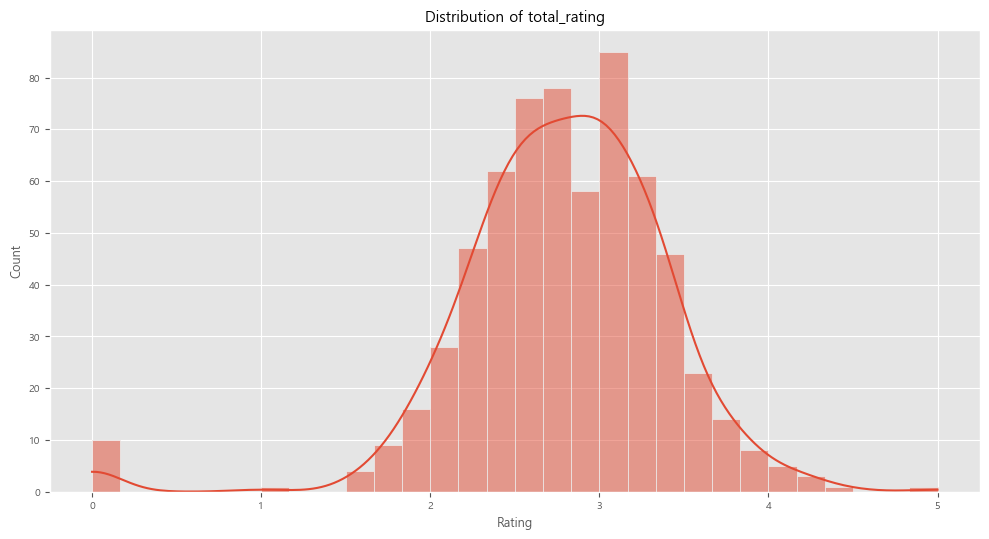

In [11]:
# total_rating 만 시각화 해보기

plt.figure(figsize=(12, 6))
sns.histplot(data=star_df, x='rating', kde=True)
plt.title('Distribution of total_rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 가중치 설정 잘 된것 확인 가능

In [43]:
# sql에 업로드

username = "multi"
password = "Campus123!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Warehouse"

desired_table_name = "final_rating"

cnx = pymysql.connect(user=username, password=password, host=hostname)
cursor = cnx.cursor()

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)
Session = sessionmaker(bind=engine)
session = Session()

try:
    star_df.to_sql(
        desired_table_name, con=engine, if_exists="replace", index=False, chunksize=1000
    )
    session.commit()
except:
    session.rollback()
    raise
finally:
    session.close()

cursor.close()
cnx.close()